In [125]:
import numpy as np
import matplotlib.pyplot as plt
import ipympl
from mpl_toolkits.mplot3d import Axes3D

In [142]:
%matplotlib inline
#%matplotlib notebook

In [143]:
A = np.array([3., 2., 1.])
B = np.array([3., 3., 3.])
C = np.array([12., 2., 6.])

orig_object = [A, B, C]

xaxis = np.array([1., 0., 0.])
yaxis = np.array([0., 1., 0.])
zaxis = np.array([0., 0., 1.])
I = np.array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])

Option nr 1. Define the following matrix from the axis vector $\vec{v}$: $$ v_{cross} =
\begin{bmatrix}
0 & -v_z & v_y\\
v_z & 0 & -v_x\\
-v_y & v_x & 0
\end{bmatrix}$$

In [144]:
def v_cross(v):
    return np.array([[0.,-v[2],v[1]],[v[2],0.,-v[0]],[-v[1],v[0],0.]])

Use the Rodrigues' formula for the rotation matrix: $$ R = I + (\sin{\theta})v_{cross} + (1-\cos{\theta})v_{cross}^2$$

In [145]:
theta_y = np.radians(45)
R_y = I + np.sin(theta_y)* v_cross(yaxis) + (1-np.cos(theta_y))*np.matmul(v_cross(yaxis), v_cross(yaxis))

In [146]:
A_r = np.matmul(R_y, A)
B_r = np.matmul(R_y, B)
C_r = np.matmul(R_y, C)

rotated_object = [A_r, B_r, C_r]

In [147]:
def plot_3D(orig_object, rotated_object):

    fig = plt.figure(figsize=[5, 5])
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    for i, p in enumerate(orig_object):
        ax.scatter(p[0], p[1], p[2], label='original', s=40, c='k')
        ax.text(p[0], p[1], p[2],  '%s' % (str(i)), size=10, zorder=1,
                color='k')

    for i, r in enumerate(rotated_object):
        ax.scatter(r[0], r[1], r[2], label='rotated', s=40, c='g')
        ax.text(r[0], r[1], r[2],  '%s' % (str(i)), size=10, zorder=1,
                color='k')


    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


    plt.show()

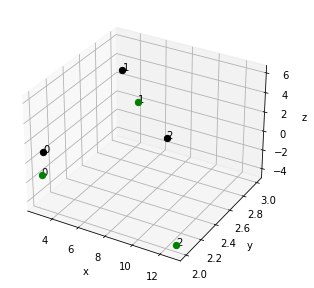

In [148]:
plot_3D(orig_object, rotated_object)

In [149]:
theta_x = np.radians(120)
R_x = I + np.sin(theta_x)* v_cross(xaxis) + (1-np.cos(theta_x))*np.matmul(v_cross(xaxis), v_cross(xaxis))

In [150]:
A_r2 = np.matmul(R_x, A_r)
B_r2 = np.matmul(R_x, B_r)
C_r2 = np.matmul(R_x, C_r)

rotated_object2 = [A_r2, B_r2, C_r2]

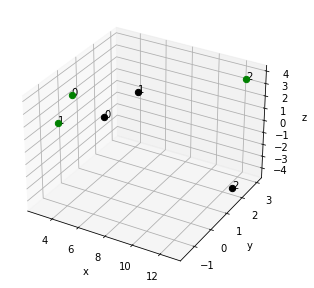

In [151]:
plot_3D(rotated_object, rotated_object2)

In [152]:
print(rotated_object2)

[array([2.82842712, 0.22474487, 2.43915759]), array([ 4.24264069, -1.5       ,  2.59807621]), array([12.72792206,  2.67423461,  3.85337115])]


In [153]:
final_object = []

for c in rotated_object2:
    c =  c - 2 * zaxis
    final_object.append(c)

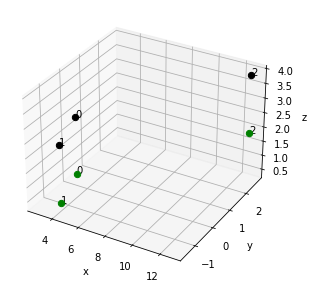

In [154]:
plot_3D(rotated_object2, final_object)

In [155]:
print(final_object)

[array([2.82842712, 0.22474487, 0.43915759]), array([ 4.24264069, -1.5       ,  0.59807621]), array([12.72792206,  2.67423461,  1.85337115])]


Option nr 2: Use the basic rotation matrices. $$ R_x =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos(\theta) & - \sin(\theta) \\
0 & \sin(\theta) & \cos(\theta)
\end{bmatrix} \\
R_y =
\begin{bmatrix}
\cos(\theta) & 0 & \sin(\theta) \\
0 & 1 & - 0\\
- \sin(\theta) & 0 & \cos(\theta)
\end{bmatrix} $$

In [156]:
Rx = np.array([[1, 0, 0], [0, np.cos(theta_x), -np.sin(theta_x)], [0, np.sin(theta_x), np.cos(theta_x)]])
Ry = np.array([[np.cos(theta_y), 0, np.sin(theta_y)], [0, 1, 0], [-np.sin(theta_y), 0, np.cos(theta_y)]])

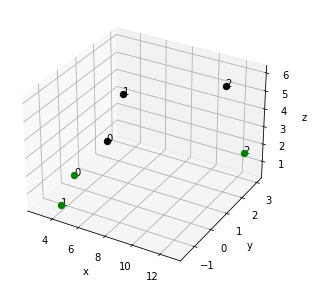

[array([2.82842712, 0.22474487, 0.43915759]), array([ 4.24264069, -1.5       ,  0.59807621]), array([12.72792206,  2.67423461,  1.85337115])]


In [157]:
final_object2 = []

for p in orig_object:
    # rotate 45 degrees around y-axis
    r_y = np.matmul(Ry, p)
    # rotate 120 degrees around x-axis
    r_x = np.matmul(Rx, r_y)
    # translate -2 units along z-axis
    t_z = r_x - 2 * zaxis
    final_object2.append(t_z)

plot_3D(orig_object, final_object)
print(final_object)



Result: $$
A_{transformed} = [2.83, 0.225, 0.439] \\
B_{transformed} = [4.24, -1.5, 0.598] \\
C_{transformed} = [12.7, 2.67, 1.85] $$